<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
import scipy.special as sp
from scipy.integrate import simps
from scipy.integrate import quad
from scipy.special import ellipk

#Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [ ]:
t = ([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])
L=0.98
R=0.142
data = {'Tiempo (s)': t, 'Corriente (A)': i}
df = pd.DataFrame(data)
df

,Tiempo (s),Corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


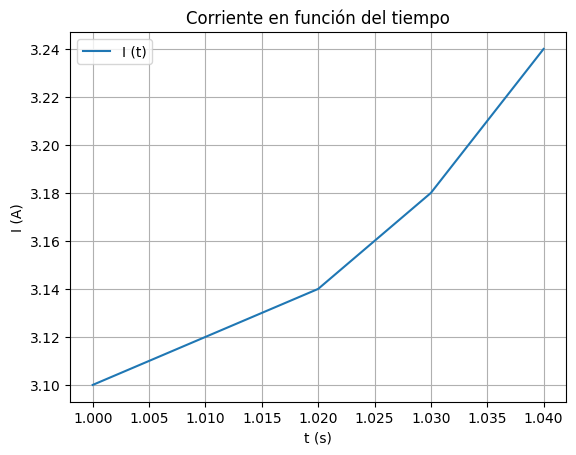

In [ ]:
plt.plot(df['Tiempo (s)'], df['Corriente (A)'],label='I (t)')
plt.xlabel('t (s)')
plt.ylabel('I (A)')
plt.title('Corriente en función del tiempo')
plt.legend()
plt.grid()

In [ ]:
derivada=np.gradient(i,t)  #derivada númerica utilizando un método de diferencias
derivada #muestra cómo es el cambio en la función


array([2., 2., 3., 5., 6.])

In [ ]:
#otra forma de hacerlo
di=np.diff(i)
dt=np.diff(t)
d=di/dt
d #asociado a las pendientes(la diferencia con los valores de i respecto a las diferencias de los valores de t)

array([2., 2., 4., 6.])

In [ ]:
e=L*derivada+R*i
df['Fem (V)']=e
df

,Tiempo (s),Corriente (A),Fem (V)
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


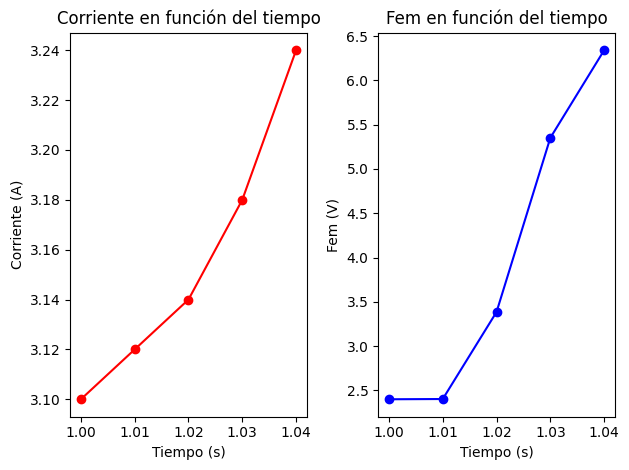

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(df['Tiempo (s)'], df['Corriente (A)'], 'ro-')
axs[0].set_title('Corriente en función del tiempo')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Corriente (A)')
axs[1].plot(df['Tiempo (s)'], df['Fem (V)'], 'bo-')
axs[1].set_title('Fem en función del tiempo')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Fem (V)')
plt.tight_layout()
plt.show()

\begin{equation}
  f´(x_0)=\frac{1}{2h}[-3f(x_0)+4f(x_0+h)-f(x_0+2h)]
\end{equation}

donde $h=x_1-x_0$

hacer derivada tres puntos y  polinio de lagrange

In [ ]:
import sympy as sp
from scipy.interpolate import lagrange

<ipython-input-14-566d9e77db7e>:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(xm, pl(xm), 'k-',label='Interpolación de Lagrange', linestyle='--')


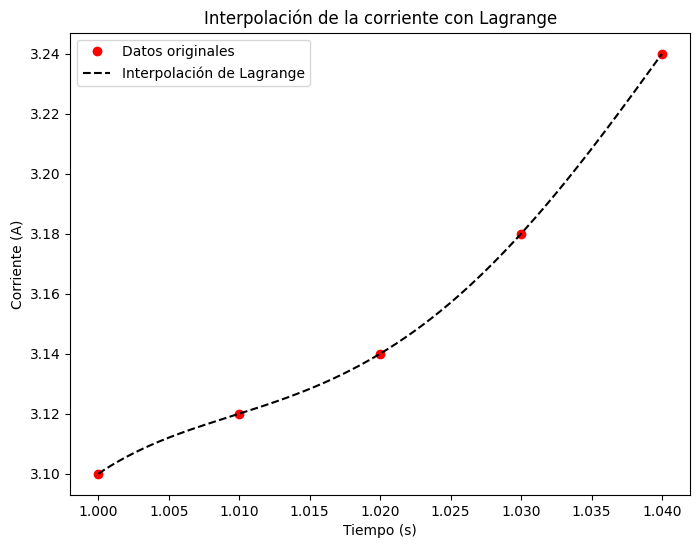

In [ ]:
pl=lagrange(t,i)
plt.figure(figsize=(8, 6))
xm=np.linspace(np.min(t),np.max(t),10000)
plt.plot(t, i, 'ro', label='Datos originales')
plt.plot(xm, pl(xm), 'k-',label='Interpolación de Lagrange', linestyle='--')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.title('Interpolación de la corriente con Lagrange')
plt.legend()

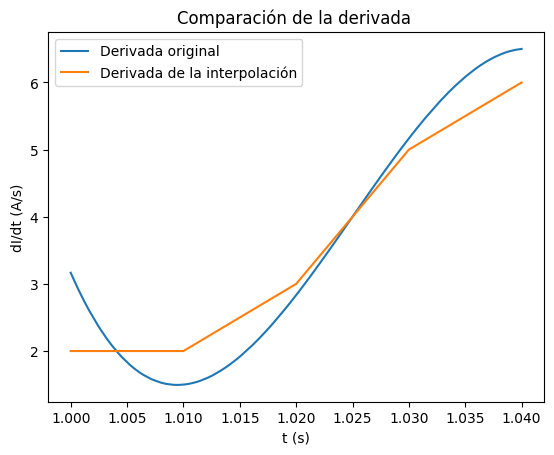

In [ ]:
polinomio_lagrange=pl(xm)
polinomio_lagrange

h=1e-6
derivada1=1/(2*h)*(-3*pl(xm)+4*pl(xm+h)-pl(xm+2*h))
derivada1
plt.plot(xm,derivada1,label='Derivada original')
plt.plot(t,derivada, label='Derivada de la interpolación')
plt.xlabel('t (s)')
plt.ylabel('dI/dt (A/s)')
plt.title('Comparación de la derivada ')
plt.legend()

##**Parte 2**

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

#1). Regla del trapecio

La expresión para calcular una integral usando la regla del trapecio es:

\begin{equation}
  \int_{a}^{b} f(x) \, dx \approx \frac{b-a}{n} \left[ f(x_0) + f(x_n)
   + 2
\sum_{i=1}^{n-1}f(x_{i})
\right  ]
\end{equation}

#2). Regla de simpson

La expresión para calcular una integral cin la regla de SImpson es:

\begin{equation}
  \int_{a}^{b}f(x) dx\approx \frac{b-a}{3n} \left[ f(x_0) + f(x_n)
   + 2
\sum_{i=1}^{n/2-1}f(x_{2i}) + 4 \sum_{i=1}^{n/2} f(x_{2i-1})
\right  ]
\end{equation}

#3). Método de cuadratura

La forma e calcular una integral con el método de cuadratura es

\begin{equation}
  \int_{a}^{b}f(x) dx≈ \sum_{i=1}^{n}w_if(x_i)
\end{equation}

donde $w_i$ son los pesos asociados a los puntos de cuadratura $x_i$

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dydx}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

##*Regla del trapecio*

In [ ]:
f1=lambda x: 1/(np.sqrt(np.tan(x))) #Función 1
f2=lambda x: np.cos(x)/x**3 #Función 2
f3=lambda y: 1/np.sqrt(1-y**2)  #Función 3

In [ ]:
def integral_trapecio(f,a,b):
  n=1000000
  x=np.linspace(a,b,n)
  h=(b-a)/n
  sum=0
  for i in range(1,n):
    sum+=f(x[i])
    integral=(f(a)+f(b)+2*sum)*h/2
  return integral

In [ ]:
#integral de la función usando la función integral_trapecio
print("El valor de la integral de la función 1 es", integral_trapecio(f1,1e-9,(np.pi)/2))


#integral del trapecio usando una función de numpy
a=1e-9
b=np.pi/2
x=np.linspace(a,b,1000000)
f1_=f1(x)
trapecio=np.trapz(f1_,x)
print("El valor de la integral de la función 1 usando una función de numpy es",trapecio)


El valor de la integral es 2.244444393911449
El valor de la integral usando una función de numpy es 2.2444466383581103


In [ ]:
#integral de la función usando la función integral_trapecio
print("El valor de la integral de la función 2es", integral_trapecio(f2,1,1e3))

#integral del trapecio usando una función de numpy
a=1
b=1e3
x=np.linspace(a,b,1000000)
f2_=f2(x)
trapecio=np.trapz(f2_,x)
print("El valor de la integral de la función 2 usando una función de numpy es",trapecio)

El valor de la integral es 0.01811780947681933
El valor de la integral usando una función de numpy es 0.018117827594086252


In [ ]:
n=10000
x=np.linspace(0,np.pi/4,n)
l=np.zeros(n)
for i,x_ in enumerate(x):
  y=np.linspace(0,np.sin(x_),n)
  I1=np.trapz(f3(y),y)
  l[i]=I1

I_resultante=np.trapz(l,x)
print("El valor de la integral de la función 3 usando una función de numpy es",I_resultante)

El valor de la integral usando una función de numpy es 0.30842513766192337


##*Regla de Simpson*

In [ ]:
def integral_simpson(f,a,b):
  n=1000000
  h=(b-a)/n
  suma=0
  x = a
  suma+=f(a)+f(b)
  for i in range(1,n//2):
    x=a+2*i*h
    suma+=2*f(x)
  for i in range(1, n//2 + 1):
    x=a+(2*i-1)*h
    suma+=4*f(x)
  suma*=h/3
  return suma

In [ ]:
#integral de la función usando la función integral_simpson
print("El valor de la integral de la función 1 es", integral_simpson(f1,1e-9,(np.pi)/2))

#integral de simpson usando una función de numpy
a=1e-9
b=np.pi/2
x=np.linspace(a,b,1000000)
f1_=f1(x)
simpson=simps(f1_,x)
print("El valor de la integral de la función 1 usando una función de numpy es",simpson)

El valor de la integral es 2.23642039878166
El valor de la integral usando una función de numpy es 2.2364204144765023


In [ ]:
#integral de la función usando la función integral_simpson
print("El valor de la integral de la función 2 es", integral_simpson(f2,1,1e3))

#integral de simpson usando una función de numpy
a=1
b=1e3
x=np.linspace(a,b,1000000)
f2_=f2(x)
simpson=simps(f2_,x)
print("El valor de la integral de la función 2 usando una función de numpy es",simpson)

El valor de la integral es 0.018117622806103066
El valor de la integral usando una función de numpy es 0.01811762280610362


In [ ]:
n=10000
x=np.linspace(0,np.pi/4,n)
l=np.zeros(n)
for i,x_ in enumerate(x):
  y=np.linspace(0,np.sin(x_),n)
  I1=simps(f3(y),y)
  l[i]=I1

I_resultante=simps(l,x)
print("El valor de la integral de la función 3 usando una función de numpy es",I_resultante)

El valor de la integral usando una función de numpy es 0.3084251375340424


##*Método de Cuadratura*

In [ ]:
#integral método de cuadratura usando una función de numpy
a=1e-9
b=np.pi/2
x=np.linspace(a,b,1000000)
cuadratura=quad(f1,a,b)[0]
print("El valor de la integral de la función 1 usando una función de numpy es",cuadratura)

El valor de la integral usando una función de numpy es 2.22144146908185


In [ ]:
a1=1
b1=np.inf
cuadratura1=quad(f2,a1,b1,limit=100000)[0]
print("El valor de la integral de la función 2 usando una función de numpy es",cuadratura1)

El valor de la integral de la función 2 usando una función de numpy es 0.018117622548772427


In [ ]:
a1=0
b1=np.pi/4
f=lambda x,y: 1/np.sqrt(1-y**2)  #Función 3
def F3(x):
  return quad(lambda y: f(x, y), 0, np.sin(x))[0]
cuadratura2=quad(F3,a1,b1,limit=100000)[0]
print("El valor de la integral de la función 2 usando una función de numpy es",cuadratura2)

El valor de la integral de la función 2 usando una función de numpy es 0.30842513753404244


## Parte 3

Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

Para un péndulo simple con cuerda inextensible y tensión uniforme:



*   **$I_0$** es el momento de incercía: **$I_0=I_{cm} + mb^2$**, donde **$I_{cm}$** es el momento de inercia del objeto respecto a su centro de masa.
Si suponemos el péndulo físico como una barra delgada rotando alrededor de un eje perpendicular a la barra ypasando por su centro, entonces **$I_{cm}=\frac {1}{12}mb^2$**, por tanto:**$$I_0=\frac {1}{12}mb^2 + \frac {b^2}{4}m$$**
Entonces **$$I_0 =\frac {1}{3}mb^2$$**
*   **$b$** es la distancia desde el punto de suspensión hasta el centro de masa del péndulo
*   **$θ_0$**  es la amplitud de las oscilaciones, es decir el ánguloi máximo.


In [ ]:
#Parámetros iniciales

b=1.0  # distancia al centro de masa en m
m=5.0  # masa del péndulo en kg
g=9.82  # gravedad
theta0=np.pi / 6  # amplitud angular máxima

In [ ]:
def I0(m, b):  # momento de inercia
  I=(1/3)*m*b**2
  return I

def P0(m, b):  # período pequeñas oscilaciones para un péndulo físico
  P=2*np.pi*np.sqrt(I0(m,b) /(m*g*b))
  return P

k=np.sin(theta0 / 2)

def Integral_periodo(k):  #integral usando el método de cuadratura
  intg=lambda phi, k: 1/np.sqrt(1-k**2*np.sin(phi)**2)
  I=quad(intg,0,np.pi/2,args=(k,))[0]
  return I

P=2*P0(m,b)*Integral_periodo(k)/np.pi

In [ ]:
print(f"Periodo del péndulo para pequeñas oscilaciones (P0):{P0(m,b):.4f} s")
print(f"Periodo de oscilación para grandes oscilaciones (P): {P:.4f} s")


P_exacto=(2*P0(m,b)/np.pi)*ellipk(k**2)  #comporbación de resultados con la función de integral elíptica de scipy
print(f"Periodo exacto usando integral elíptica de scipy: {P_exacto:.4f} s")

#error
error=(abs(P- P_exacto)/P_exacto)*100
print(f"Diferencia entre el resultado numérico y el valor exacto: {error:.4e} s")

Periodo del péndulo para pequeñas oscilaciones (P0):1.1576 s
Periodo de oscilación para grandes oscilaciones (P): 1.1778 s
Periodo exacto usando integral elíptica de scipy: 1.1778 s
Diferencia entre el resultado numérico y el valor exacto: 1.8853e-14 s


## Parte 4

The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [ ]:
a0=1.3862944
b0=0.5
a1=0.1119723
b1=0.1213478
a2=0.00725296
b2=0.0288729
def aprox_eliptica(m,e=3e-5):
  m1=1-m
  if m >=0 and m<=1:
    sum1 = a0+a1*m1+a2*m1**2
    sum2 = (b0 + b1 * m1 + b2 * m1 ** 2) * np.log(m1)
    return sum1 - sum2 + e
  else:
    return print('m debe ser $ 0 \le m \le1 $')

def K(m):
  k=lambda phi,m:1/np.sqrt(1-m*np.sin(phi)**2)
  I= quad(k,0,np.pi/2,args=(m,))[0]
  return I

In [ ]:
#Valor de la integral usando la aproximación elíptica
m= [0.1, 0.5, 0.9]
for i in m:
  resultado = aprox_eliptica(i)
  print(f"Aproximación para m = {i}: {resultado}")

Aproximación para m = 0.1: 1.5596254370750164
Aproximación para m = 0.5: 1.837756615305946
Aproximación para m = 0.9: 2.5774928927231007


In [ ]:
#Valor de la integral usando la integral
m= [0.1, 0.5, 0.9]
for i in m:
  resultado = K(i)
  print(f"Resultado de la integral para m = {i}: {resultado}")

Aproximación para m = 0.1: 1.6124413487202194
Aproximación para m = 0.5: 1.854074677301372
Aproximación para m = 0.9: 2.5780921133481725


# Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:
a = 1
I = 3
mu=1

def K(k):
  return sp.ellipk(k**2)

def E(k):
  return sp.ellipe(k**2)
def k_cuad(r, theta):
  k2=4*a*r*np.sin(theta)/(a**2+r**2+2*a*r*np.sin(theta))
  return k2

def Apotencial(r, theta):
  kcuadrado=k_cuad(r, theta)
  k=np.sqrt(kcuadrado)
  n=(2-kcuadrado)*K(k)-2*E(k)
  d=kcuadrado
  A=(mu/4*np.pi)*(4*I*a/np.sqrt(a**2+r**2+2*a*r*np.sin(theta)))*(n/d)
  return A


<ipython-input-60-63269b7405a6>:19: RuntimeWarning: invalid value encountered in scalar divide
  A=(mu/4*np.pi)*(4*I*a/np.sqrt(a**2+r**2+2*a*r*np.sin(theta)))*(n/d)


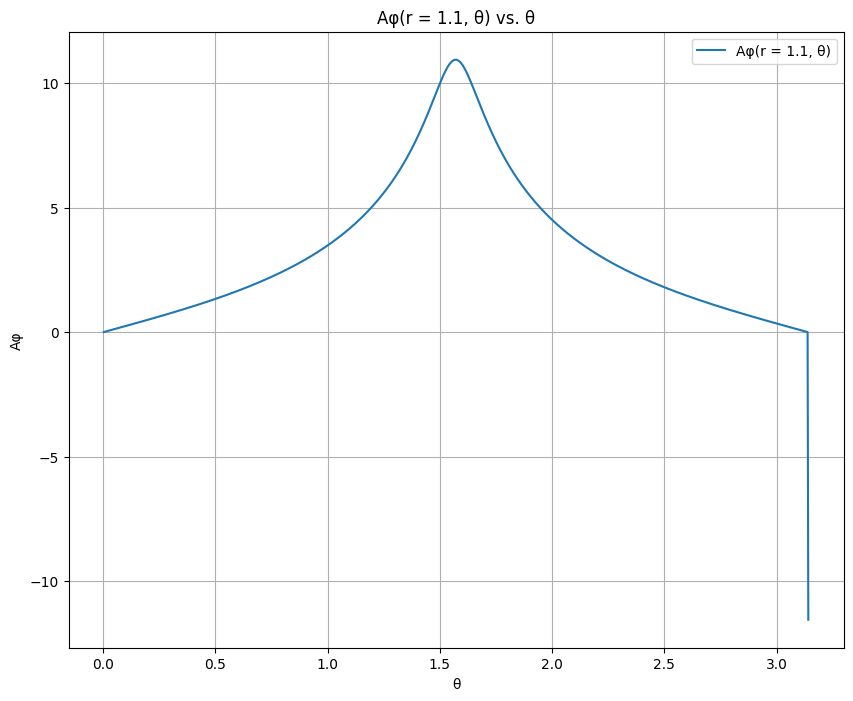

In [ ]:
#a) Aφ(r = 1.1, θ) vs. θ
theta=np.linspace(0,np.pi,1000)
r=1.1
potencial=[]
for i in theta:
  potencial.append(Apotencial(r, i))

plt.figure(figsize=(10, 8))
plt.plot(theta, potencial, label='Aφ(r = 1.1, θ)')
plt.title('Aφ(r = 1.1, θ) vs. θ')
plt.xlabel('θ')
plt.ylabel('Aφ')
plt.legend()
plt.grid()
plt.show()

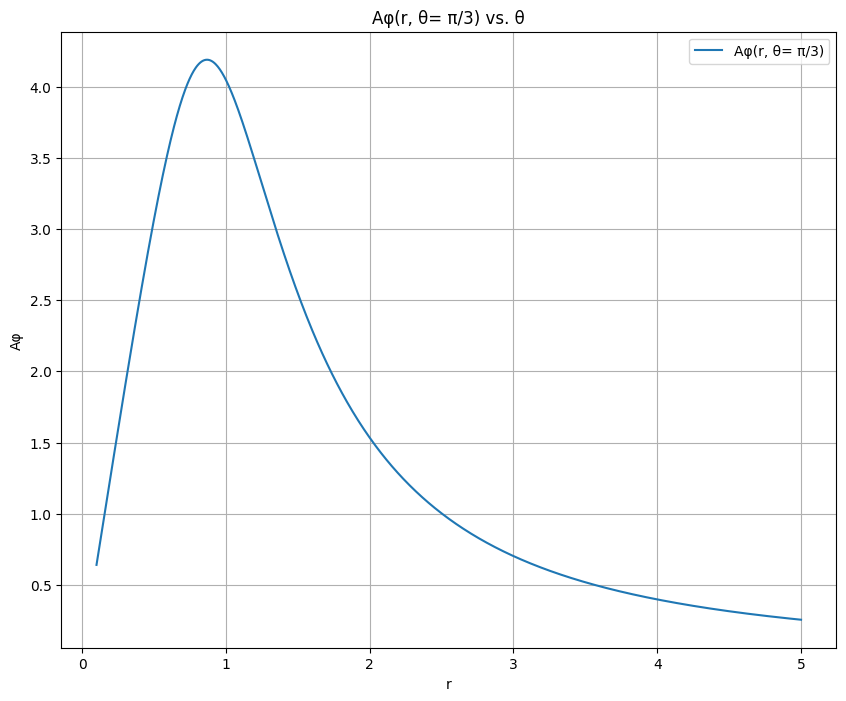

In [ ]:
#b) Aφ(r, θ = π∕3) vs. r

r=np.linspace(0.1,5,1000)
theta=np.pi/3
potencial=[]
for i in r:
  potencial.append(Apotencial(i, theta))

plt.figure(figsize=(10, 8))
plt.plot(r, potencial, label='Aφ(r, θ= π/3)')
plt.title('Aφ(r, θ= π/3) vs. θ')
plt.xlabel('r')
plt.ylabel('Aφ')
plt.legend()
plt.grid()
plt.show()